#Training the sentiment analysis model

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
import json
import bs4 as bs
import urllib.request
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [ ]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [ ]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100

98.77167630057804

In [ ]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Rough Area 
> practing the codes

In [ ]:
!pip install tmdbv3api

In [ ]:
import pickle
import pandas as pd
import numpy as np
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import bs4 as bs
import urllib.request



tmdb = TMDb()
tmdb.api_key="12aee6e6e9db1d19c5d8078b2188e3a6"
tmdb_movie = Movie()

def get_info(title):
  info=[]
  result = tmdb_movie.search(title)
  if result:
    movie_id = result[0].id
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=12aee6e6e9db1d19c5d8078b2188e3a6')
    data_json = response.json()
  else:  
    return None
  
  return data_json

In [ ]:
def get_reviews(title):
  details = get_info(title)
  imdb_id = details['imdb_id']

  sauce = urllib.request.urlopen(f'https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ov_rt').read()
  soup = bs.BeautifulSoup(sauce,'lxml')
  soup_result = soup.find_all("div",{"class":"text show-more__control"})
  reviews,reviews_status = [],[]
  reviews_list=[]
  for reviews in soup_result:

    if reviews.string:
      reviews_list.append(reviews.string)
            # passing the review to our model
      movie_review_list = np.array([reviews.string])
      movie_vector = vectorizer.transform(movie_review_list)
      pred = clf.predict(movie_vector)
      reviews_status.append('Good' if pred else 'Bad')
    else:
      print('error')
  return reviews_status, soup_result

In [ ]:
def get_reviews(title):
  details = get_info(title)
  imdb_id = details['imdb_id']

  sauce = urllib.request.urlopen(f'https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ov_rt').read()
  soup = bs.BeautifulSoup(sauce,'lxml')
  soup_result = soup.find_all("div",{"class":"text show-more__control"})
  reviews = []
  for i in range(len(soup_result)):
    reviews.append(soup_result[i].text)

  full_reviews = pd.DataFrame(reviews,  columns=['reviews'])
  reviews,reviews_status,reviews_list= [],[],[]
 
  for reviews in full_reviews['reviews']:
    reviews= [reviews]
    movie_vector = vectorizer.transform(reviews)
    pred = clf.predict(movie_vector)
    reviews_status.append('Good' if pred else 'Bad')
    
  full_reviews['sentiments'] = reviews_status
  return full_reviews
  

In [ ]:
review_full = get_reviews('Avatar')

In [ ]:
review_full

,reviews,sentiments
0,"As of today, there are 2675 reviews for ""Avata...",Good
1,I did see Avatar for the first time a while ag...,Good
2,It's impossible to watch AVATAR for the first ...,Good
3,Avatar (2009) **** (out of 4)A paraplegic mari...,Good
4,Marine Jake Sully (Sam Worthington) is paralyz...,Good
5,"This is a remarkable experience, like watching...",Good
6,high technology. imaginative director. tastefu...,Good
7,"""Avatar"" is an American movie from 2009 and st...",Bad
8,"I've been badgered to see this film for years,...",Good
9,In a futuristic society ruled by the economica...,Good


In [ ]:
demo = reviews_full['reviews'][4]
demo

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from string import  punctuation
punctuation = punctuation + '\n' + "''"+'``'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n\'\'``'

In [ ]:
sentances = sent_tokenize(demo)
tokens = word_tokenize(demo)
word_freq={}
for word in tokens:
  if word.lower() not in punctuation:
    if word.lower() not in stop_words:
      if word not in word_freq.keys():
        word_freq[word]=1
      else:
        word_freq[word]+=1
word_freq    

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentances = sent_tokenize(demo)
tokens = word_tokenize(demo)

In [ ]:
sentances

In [ ]:
def summarizer(review):
  sentances = sent_tokenize(review)
  tokens = word_tokenize(review)
  word_freq={}
  for word in tokens:
    if word.lower() not in punctuation:
      if word.lower() not in stop_words:
        if word not in word_freq.keys():
          word_freq[word]=1
        else:
          word_freq[word]+=1
  maximum_freq = max(word_freq.values())
  for word in word_freq.keys():
    word_freq[word] = word_freq[word] / maximum_freq

  sentence_weigth = dict()
  for sent in sentances:
    sentence_wordcount = len(word_tokenize(sent))
    sent_count_without_stopwords = 0
    for word_weigth in word_freq:
      if word_weigth in sent.lower():
        sent_count_without_stopwords +=1
        if sent in sentence_weigth:
          sentence_weigth[sent] += word_freq[word_weigth]
        else:
          sentence_weigth[sent] = word_freq[word_weigth]
    sentence_weigth[sent] = sentence_weigth[sent] 
  length = 1
  summary = nlargest(length, sentence_weigth, key=sentence_weigth.get)
  final_summary = [word for word in summary]
  summary = ''.join(final_summary)
  return summary

In [ ]:
maximum_freq = max(word_freq.values())
maximum_freq

36

In [ ]:
for word in word_freq.keys():
  word_freq[word] = word_freq[word] / maximum_freq

In [ ]:
word_freq

In [ ]:
sentances

In [ ]:
demo

'"Spectre" is the newest entry to the long-running and successful James Bond franchise. It is Daniel Craig\'s fourth turn as the world\'s most famous agent and the second time for Sam Mendes as director. The movie takes place basically right after the end of "Skyfall" and there are several references back to this third Daniel Craig Bond film, but also to the two films before that, mostly about Vesper Lynd, but also about LeChiffre. Judi Dench has a brief scene as M again and we find out what happened to Mr. White. But now that I mentioned M, let\'s elaborate a bit on that. Ralph Fiennes is back in the role and he is a very different M than all the ones before him. He actually keeps firing and fighting, something you totally wouldn\'t expect if you knew these characters from the old movies sitting behind their desk from 9 to 5 or longer. Then again, Fiennes\' M has some kind of military background if I remember "Skyfall" correctly.The female main character is played by French actress Lé

In [ ]:
'We have Italy.'

In [ ]:
sentence_weigth = dict()

for sent in sentances:
  sentence_wordcount = len(word_tokenize(sent))
  sent_count_without_stopwords = 0
  for word_weigth in word_freq:
    if word_weigth in sent.lower():
      sent_count_without_stopwords +=1
      if sent in sentence_weigth:
        sentence_weigth[sent] += word_freq[word_weigth]
      else:
        sentence_weigth[sent] = word_freq[word_weigth]
    
  sentence_weigth[sent] = sentence_weigth[sent]



KeyError: ignored

In [ ]:
sentence_weigth

{'"Spectre" is no exception and provides an additional amusing situation, with the weirdo Daniel Craig seducing the gorgeous Léa Seydoux and Monica Bellucci without any chemistry.': 3.3333333333333335,
 'My vote is seven.Title (Brazil): "007 Contra Spectre" ("007 against Spectre")': 1.3333333333333333,
 'When the viewer watches any 007 franchise, he or she knows what is going to see: an entertaining full of action adventure, with beautiful women, car chase, conspiracy, great villains, predictable story and a brainless screenplay.': 7.9999999999999964}

In [ ]:
len(sentence_weigth)

3

In [ ]:
from heapq import nlargest

In [ ]:
 #top 30% weighted sentences
length = 1 #int(len(sentence_weigth)*0.15)
length

1

In [ ]:
summary = nlargest(length, sentence_weigth, key=sentence_weigth.get)

In [ ]:
final_summary = [word for word in summary]
summary = ''.join(final_summary)

In [ ]:
summary

'When the viewer watches any 007 franchise, he or she knows what is going to see: an entertaining full of action adventure, with beautiful women, car chase, conspiracy, great villains, predictable story and a brainless screenplay.'

In [ ]:
len(demo)


1613

In [ ]:
len(summary)

609

In [ ]:
demo = reviews_full['reviews'][5]

In [ ]:
summarizer(reviews_full['reviews'][1])

"Following on from the success of SKYFALL, the latest James Bond flick sees both Daniel Craig and Sam Mendes returning to the franchise for a film which seems strangely old-fashioned, perhaps deliberately harking back to the classic days of Bond.SPECTRE isn't a perfect film by any sense, and the problems lie with the script."

In [ ]:
def summarizer(review):
  sentances = sent_tokenize(review)
  tokens = word_tokenize(review)

  word_freq={}
  for word in tokens:
    if word.lower() not in punctuation:
      if word.lower() not in stop_words:
        if word not in word_freq.keys():
          word_freq[word]=1
        else:
          word_freq[word]+=1
  
  maximum_freq = max(word_freq.values())
  for word in word_freq.keys():
    word_freq[word] = word_freq[word] / maximum_freq

  sentence_weigth = dict()
  for sent in sentances:
    sentence_wordcount = len(word_tokenize(sent))
    sent_count_without_stopwords = 0
    for word_weigth in word_freq:
      if word_weigth in sent.lower():
        sent_count_without_stopwords +=1
        if sent in sentence_weigth:
          sentence_weigth[sent] += word_freq[word_weigth]
        else:
          sentence_weigth[sent] = word_freq[word_weigth]
    sentence_weigth[sent] = sentence_weigth[sent]

    length = int(len(sentence_weigth)*0.07)

  summary = nlargest(length, sentence_weigth, key=sentence_weigth.get)
  final_summary = [word for word in summary]
  summary = ''.join(final_summary)

  return summary


In [ ]:
len(summarizer(demo))

407

In [ ]:
summarizer(demo)

"Stephen Lang is an enjoyable and over-the-top villain of the piece too, however Sigourney Weaver is somewhat so-so, doesn't help really her character isn't that interesting while Michelle Rodriguez and Joel Moore aren't given very much to do.What didn't work so well is that Avatar's story, with themes of love in a time of chaos and man alone in a hostile environment, is rather simplistic and predictable."

In [ ]:
review_full.head()
review_full['sentiments'].value_counts().index

Index(['Good', 'Bad'], dtype='object')

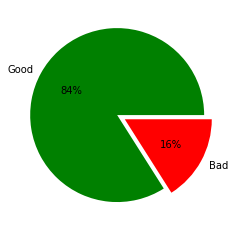

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
values=review_full['sentiments'].value_counts().values
labels = review_full['sentiments'].value_counts().index

colors = ['green','red']

#create pie chart
plt.pie(values, labels = labels, colors = colors,explode=[0,0.1], autopct='%.0f%%')
plt.savefig('pie.png', transparent=True)
plt.show()

In [ ]:
review_full.head(2)

,reviews,sentiments
0,"As of today, there are 2675 reviews for ""Avata...",Good
1,I did see Avatar for the first time a while ag...,Good


In [ ]:
details = get_info('Avatar 2')
imdb_id = details['imdb_id']
imdb_id

'tt1630029'

In [ ]:
!pip install urlextract

In [ ]:
from urlextract import URLExtract
text = 'gmail.com,jnosfjniwerjglwsnkvl youtube.org'
extractor = URLExtract()
extractor.find_urls(str(soup_result[0]))

['https://m.media-amazon.com/images/M/MV5BNDU1NjU0MzA5NF5BMl5BanBnXkFtZTgwNTg5OTY2MjI@._V1_UY317_CR10,0,214,317_AL_.jpg']

In [ ]:
import re

In [ ]:
sauce = urllib.request.urlopen(f'https://www.imdb.com/name/nm094177/?ref_=tt_ov_st').read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("div",{"class":"image"})
castposter = []
extractor.find_urls(str(soup_result[0]))
# for i in range(1):
#   pattern = '[a-zA-Z]{2}\d{6}'
#   id = re.findall(pattern,str(soup_result[i])).pop()
#   sauce2 = urllib.request.urlopen(f'https://www.imdb.com/name/{id}/?ref_=ttfc_fc_cl_t2').read()
#   soup2 = bs.BeautifulSoup(sauce,'lxml')
#   poster = soup.find_all("div",{"class":"poster-hero-container"})
#   print(poster)


HTTPError: ignored

In [ ]:
for i in range(3):
  pattern = '[a-zA-Z]{2}\d{6}'
  print(re.findall(pattern,str(soup_result[i])).pop())

nm094177
nm075785
nm000024


In [ ]:
sauce = urllib.request.urlopen(f'https://www.imdb.com/name/nm0695435/?ref_=tt_ov_st').read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("div",{"class":"poster-hero-container"})
from urlextract import URLExtract
soup_result[0]

ModuleNotFoundError: ignored

In [ ]:
link = "https://www.imdb.com/title/tt0499549/ratings/?ref_=tt_ov_rt"
df1 = pd.read_html(link, header=0)[1]
df1

,Unnamed: 0,All Ages,<18,18-29,30-44,45+
0,All,"7.8 1,177,422",7.6 462,"7.7 188,589","7.8 549,128","7.9 122,033"
1,Males,"7.8 732,553",7.5 326,"7.7 140,557","7.8 446,272","7.9 101,238"
2,Females,"7.7 168,068",7.6 86,"7.6 42,788","7.7 96,016","7.9 18,645"


In [ ]:
df1.rename(columns={'Unnamed: 0': 'Gender'}, inplace=True)

In [ ]:
df1

,Gender,All Ages,<18,18-29,30-44,45+
0,All,"7.8 1,177,422",7.6 462,"7.7 188,589","7.8 549,128","7.9 122,033"
1,Males,"7.8 732,553",7.5 326,"7.7 140,557","7.8 446,272","7.9 101,238"
2,Females,"7.7 168,068",7.6 86,"7.6 42,788","7.7 96,016","7.9 18,645"


In [ ]:
import re
demo = df1['All Ages']
str(demo)

'0    7.8  1,177,413\n1      7.8  732,550\n2      7.7  168,068\nName: All Ages, dtype: object'

In [ ]:

def splitter(obj):
  decimal = '\d*\.\d'
  return re.findall(decimal,str(obj)

In [ ]:
df1['All Ages'] = df1['All Ages'].apply(splitter)
df1['<18'] = df1['<18'].apply(splitter)
df1['18-29'] = df1['18-29'].apply(splitter)
df1['30-44'] = df1['30-44'].apply(splitter)
df1['45+'] = df1['45+'].apply(splitter)                                     

In [ ]:
df1

,Unnamed: 0,All Ages,<18,18-29,30-44,45+
0,All,[7.8],[7.6],[7.7],[7.8],[7.9]
1,Males,[7.8],[7.5],[7.7],[7.8],[7.9]
2,Females,[7.7],[7.6],[7.6],[7.7],[7.9]


# Trials

In [ ]:
!pip install tmdbv3api

In [ ]:
import pickle
import pandas as pd
import numpy as np
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json
import requests

import json
import bs4 as bs
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from string import  punctuation
from heapq import nlargest

In [ ]:
punctuation = punctuation + '\n'

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tmdb = TMDb()
tmdb.api_key="12aee6e6e9db1d19c5d8078b2188e3a6"
tmdb_movie = Movie()

def get_info(title):
  info=[]
  result = tmdb_movie.search(title)
  if result:
    movie_id = result[0].id
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=12aee6e6e9db1d19c5d8078b2188e3a6')
    data_json = response.json()
  else:  
    return None
  
  return data_json

def get_reviews(title):
  details = get_info(title)
  imdb_id = details['imdb_id']

  sauce = urllib.request.urlopen(f'https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ov_rt').read()
  soup = bs.BeautifulSoup(sauce,'lxml')
  soup_result = soup.find_all("div",{"class":"text show-more__control"})
  reviews = []
  for i in range(len(soup_result)):
    reviews.append(soup_result[i].text)

  full_reviews = pd.DataFrame(reviews,  columns=['reviews'])
  reviews,reviews_status,reviews_list= [],[],[]
 
  for reviews in full_reviews['reviews']:
    reviews= [reviews]
    movie_vector = vectorizer.transform(reviews)
    pred = clf.predict(movie_vector)
    reviews_status.append('Good' if pred else 'Bad')
    
  full_reviews['sentiments'] = reviews_status
  return full_reviews

def top5_reviews(title):
  full_data = get_reviews(title)
  return full_data.sample(7).reset_index()
  

In [ ]:
reviews_full = get_reviews("Spectre")
summarizer(reviews_full['reviews'][4])

In [ ]:
summarizer(reviews_full['reviews'][4])

''

In [ ]:
reviews_full['reviews'][:4].apply(summarizer)

0    Pierce Brosnan's are not very popular with som...
1    Following on from the success of SKYFALL, the ...
2    Dr. Madeline Swann (Léa Seydoux) is the daught...
3    He does gift us with a few seconds of Judi Den...
Name: reviews, dtype: object

In [ ]:
from string import  punctuation
punctuation = punctuation + '\n' + "''"+'``'
punctuation

def summarizer(review):
  sentances = sent_tokenize(review)
  tokens = word_tokenize(review)

  word_freq={}
  for word in tokens:
    if word.lower() not in punctuation:
      if word.lower() not in stop_words:
        if word not in word_freq.keys():
          word_freq[word]=1
        else:
          word_freq[word]+=1
  
  maximum_freq = max(word_freq.values())
  for word in word_freq.keys():
    word_freq[word] = word_freq[word] / maximum_freq

  sentence_weigth = dict()
  for sent in sentances:
      sent_count_without_stopwords = 0
      for word_weigth in word_freq:
          if not word_weigth in sent.lower():
              pass
          else:
            sent_count_without_stopwords +=1
            if sent in sentence_weigth:
              sentence_weigth[sent] += word_freq[word_weigth]
            else:
              sentence_weigth[sent] = word_freq[word_weigth]

  length = 1

  summary = nlargest(length, sentence_weigth, key=sentence_weigth.get)
  final_summary = [word for word in summary]
  summary = ''.join(final_summary)
  
  if summary:
      return summary

In [ ]:
def get_tmdb_details(title):
  info=[]
  result = tmdb_movie.search(title)
  if result:
    movie_id = result[0].id
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=12aee6e6e9db1d19c5d8078b2188e3a6')
    data_json = response.json()
  else:  
    return None
  
  return data_json

                                                          
get_tmdb_details('Thor: Love and Thunder')


{'adult': False,
 'backdrop_path': '/qB3HdCZKHWU33k9QYTIZaM4v5qo.jpg',
 'belongs_to_collection': {'backdrop_path': '/3KL8UNKFWgIKXzLHjwY0uwgjzYl.jpg',
  'id': 131296,
  'name': 'Thor Collection',
  'poster_path': '/yw7gr7DhHHVTLlO8Se8uH17TDMA.jpg'},
 'budget': 0,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'}],
 'homepage': 'https://www.marvel.com/movies/thor-love-and-thunder',
 'id': 616037,
 'imdb_id': 'tt10648342',
 'original_language': 'en',
 'original_title': 'Thor: Love and Thunder',
 'overview': "The fourth installment of the Marvel Studios' Thor movie series.",
 'popularity': 44.835,
 'poster_path': '/ifx23jgqQ8ZjUb9eiGjwbKtf0qQ.jpg',
 'production_companies': [{'id': 420,
   'logo_path': '/hUzeosd33nzE5MCNsZxCGEKTXaQ.png',
   'name': 'Marvel Studios',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '2022-07-07',
 'revenue': 0,
 'run

In [ ]:
sauce = urllib.request.urlopen(f'https://www.imdb.com/title/{imdb_id}/fullcredits?ref_=tt_cl_sm').read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("td",{"class":"primary_photo"})
from urlextract import URLExtract
soup_result[1]

<td class="primary_photo">
<a href="/name/nm0910607/"><img alt="Christoph Waltz" class="loadlate hidden " height="44" loadlate="https://m.media-amazon.com/images/M/MV5BMTM4MDk3OTYxOF5BMl5BanBnXkFtZTcwMDk5OTUwOQ@@._V1_UY44_CR0,0,32,44_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/N1QWYSqAfSJV62Y.png" title="Christoph Waltz" width="32"/></a> </td>

In [ ]:
imdb_id = get_imdb_id('Avatar')
imdb_id

'tt0499549'

In [ ]:
extractor = URLExtract()


# fetch actor piture from cast individual page


In [ ]:
sauce = urllib.request.urlopen(f'https://www.imdb.com/title/tt0499549/fullcredits/').read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("td",{"class":"primary_photo"})
id  = re.findall(pattern,str(soup_result))[:3]

  
for i in id:
  sauce = urllib.request.urlopen(f'https://www.imdb.com/name/{i}').read()
  soup = bs.BeautifulSoup(sauce,'lxml')
  soup_result = soup.find_all("img",{"id":"name-poster"})

  print(extractor.find_urls(str(soup_result)))

NameError: ignored

In [ ]:
re.findall(pattern,str(soup_result[0])).pop()

'nm0941777'

In [ ]:
soup_result[3]

<td class="primary_photo">
<a href="/name/nm0002332/"><img alt="Stephen Lang" class="loadlate hidden " height="44" loadlate="https://m.media-amazon.com/images/M/MV5BMjE4NzYwNTc5Nl5BMl5BanBnXkFtZTcwMzQzOTUyNw@@._V1_UY44_CR0,0,32,44_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/N1QWYSqAfSJV62Y.png" title="Stephen Lang" width="32"/></a> </td>

In [ ]:
sauce = urllib.request.urlopen(f'https://www.imdb.com/name/nm094177').read()
soup = bs.BeautifulSoup(sauce,'lxml')
soup_result = soup.find_all("img",{"id":"name-poster"})
from urlextract import URLExtract
extractor.find_urls(str(soup_result))

In [ ]:

def get_imdb_id(title):
  info=[]
  result = tmdb_movie.search(title)
  if result:
    movie_id = result[0].id
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=12aee6e6e9db1d19c5d8078b2188e3a6')
    data_json = response.json()
  else:  
    return None
  
  return data_json['imdb_id']

In [ ]:
get_imdb_id('Aquaman 2')

'tt1477834'

In [ ]:
!pip install urlextract

In [ ]:
!pip install tmdbv3api

In [ ]:
import requests
from urlextract import URLExtract
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json


tmdb = TMDb()
tmdb.api_key="12aee6e6e9db1d19c5d8078b2188e3a6"
tmdb_movie = Movie()

extractor = URLExtract()

def get_imdb_id(title):
  info=[]
  result = tmdb_movie.search(title)
  if result:
    movie_id = result[0].id
    response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=12aee6e6e9db1d19c5d8078b2188e3a6')
    data_json = response.json()
  else:  
    return None
  
  return data_json['imdb_id']


def get_images(title):
  imdb_id = get_imdb_id(title)

  url = "https://imdb8.p.rapidapi.com/title/get-images"

  querystring = {"tconst":imdb_id,"limit":"5"}

  headers = {
      'x-rapidapi-host': "imdb8.p.rapidapi.com",
      'x-rapidapi-key': "7f3de3d2eemsh2291312e476f463p157afbjsn020bbf7037b8"
      }

  response = requests.request("GET", url, headers=headers, params=querystring)


  return(set(extractor.find_urls(response.text)))


In [ ]:
images_total = list(get_images('Thor: Love and Thunder'))
if len(images_total) > 10:
  print(images_total[:11])
elif (len(images_total) < 10) and (len(images_total) > 5):
  print(images_total[:6])
elif (len(images_total) < 5) and (len(images_total) > 3):
  print(images_total[:4])


['https://m.media-amazon.com/images/M/MV5BNDk4MGZmYjEtZGM0OS00ZWU2LTg0OTMtMzMxNTZiM2Y2OTY4XkEyXkFqcGdeQXVyMTIwMjQ4ODcw._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMTg5NjA3ODkyMl5BMl5BanBnXkFtZTgwNTU4Mzg5NjE@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMjIwMDY3MTM2MF5BMl5BanBnXkFtZTcwNTEyOTgxOA@@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMTQwMDQ0NDk1OV5BMl5BanBnXkFtZTcwNDcxOTExNg@@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMzZjMTIwNjYtYTg0ZS00ZDFjLTk3MDctMTY3ZTgwMjQ4MmFiXkEyXkFqcGdeQXVyNjg2NjQwMDQ@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BN2RmYzMxOGEtZDBjMi00ZDQ2LTk2YmEtMmQxNjViZTU2OGY0XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMzk4MDIzNjcwNV5BMl5BanBnXkFtZTgwMTIyMjgwNDI@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BMTY0MzU1MTEzMl5BMl5BanBnXkFtZTgwMDY3OTA2MDE@._V1_.jpg', 'https://m.media-amazon.com/images/M/MV5BY2FlYTk1NjMtZDA0ZC00MDQ2LWIxNWUtYzQzZDQ2NGNlYjUxXkEyXkFqcGdeQXVyMTQzOTk3NTI0._V1_.jpg'

In [ ]:
get_imdb_id('Thor: Love and Thunder')

'tt10648342'

In [ ]:
get_images('Avatar')

{'https://m.media-amazon.com/images/M/MV5BMTYwOTEwNjAzMl5BMl5BanBnXkFtZTcwODc5MTUwMw@@._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BMTc5NTMyMjIwMV5BMl5BanBnXkFtZTcwNTMyNjYwMw@@._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BMjAwMDQ5NDY2Ml5BMl5BanBnXkFtZTgwOTk1NDczMjE@._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BNTE2NWMwYzUtMzM0Yy00NWEwLTk1MGMtOGE2OTY0YjkyMmM4XkEyXkFqcGdeQXVyMTI4MjYzOTIy._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BOWNmMjY3NzgtZjUzMS00YjBjLWI2OTctNTExZjEzMjkxZGUwXkEyXkFqcGdeQXVyMTI4MjYzOTIy._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BYjJlMmU4MmEtZGI2NS00MTI4LThhYjgtMWQyYWUzMTQ0ZjVkXkEyXkFqcGdeQXVyMTI4MjYzOTIy._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BYzhjZmRmYzYtNTVlZi00MDc2LTliZjItYzMyOTlmNmI0Y2RiXkEyXkFqcGdeQXVyMTI4MjYzOTIy._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BZDdiN2QzYjgtMmYxNC00ODljLWFlZjgtN2I3YjE5MDI3NDM4XkEyXkFqcGdeQXVyMjQwMDg0Ng@@._V1_.jpg',
 'https://m.media-amazon.com/images/M/MV5BZjhmOGExMTYtNz

# fetching cast photos and names

In [ ]:
def fetch_cast(title):
  imdb_id = get_imdb_id(title)
  sauce = urllib.request.urlopen(f'https://www.imdb.com/title/{imdb_id}/fullcredits/').read()
  soup = bs.BeautifulSoup(sauce,'lxml')
  soup_result = soup.find_all("td",{"class":"primary_photo"})
  actors = []

  for i in range(3):
    actors.append(re.findall(r'"(.*?)"', str(soup_result[i]))[2])

  pattern = "[a-zA-Z]{2}\d{7}"
  id  = re.findall(pattern,str(soup_result))[:3]
  url=[]

  for i in id:
    sauce = urllib.request.urlopen(f'https://www.imdb.com/name/{i}').read()
    soup = bs.BeautifulSoup(sauce,'lxml')
    soup_result = soup.find_all("img",{"id":"name-poster"})

    url.append(extractor.find_urls(str(soup_result)).pop())
  return url, actors

In [ ]:
 id = get_imdb_id('Avatar 2')
 id

'tt1630029'

In [ ]:
fetch_cast('Avatar 2')

(['https://m.media-amazon.com/images/M/MV5BMTM2MjIwOTc0Nl5BMl5BanBnXkFtZTcwNzQ5ODM1Mw@@._V1_UX214_CR0,0,214,317_AL_.jpg',
  'https://m.media-amazon.com/images/M/MV5BODgzMzM2NTE0Ml5BMl5BanBnXkFtZTcwMTcyMTkyOQ@@._V1_UX214_CR0,0,214,317_AL_.jpg',
  'https://m.media-amazon.com/images/M/MV5BMTg0NTI0NDkzOF5BMl5BanBnXkFtZTcwMjYwMTIwNw@@._V1_UX214_CR0,0,214,317_AL_.jpg'],
 ['Zoe Saldana', 'Kate Winslet', 'Michelle Yeoh'])

In [ ]:
get_info('Avatar 2')

In [ ]:
def get_all_movies_images(imdb):
  extractor = URLExtract() 
  
  url = "https://imdb8.p.rapidapi.com/title/get-images"

  querystring = {"tconst":imdb,"limit":"25"}

  headers = {
      'x-rapidapi-host': "imdb8.p.rapidapi.com",
      'x-rapidapi-key': "7f3de3d2eemsh2291312e476f463p157afbjsn020bbf7037b8"
      }

  response = requests.request("GET", url, headers=headers, params=querystring)
  


  return(set(extractor.find_urls(response.text)))